In [1]:
import os
import numpy as np
import pandas as pd




os.environ['TEJAPI_BASE'] = 'https://api.tej.com.tw'
os.environ['TEJAPI_KEY'] = "ZlmnASAtE0FXyBsejatM1lC1goOq32"




## 使用 `get_universe()` 函式取得股票池
`get_universe()` 函數可以幫助我們抓取特定的股票池（市場、板塊、證券種類、產業）。  
比較每一元保留盈餘是否創造超過一元的市場價值時，由於牽涉到公司上市年限是否夠久，我們選取上市期間大於 7 年的公司。  
另外，因為 ROE 可以藉由舉債來提升，因此我們排除金融產業這類高槓桿的產業。

p.s. 關於 `get_universe()` 的說明，可參考 TQuant Lab github：[get_universe 說明](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/get_universe%E8%AA%AA%E6%98%8E.ipynb)

In [2]:
from zipline.sources.TEJ_Api_Data import get_universe

pool = get_universe(start = '2021-01-01', 
                    end = '2021-12-31',  # 選取 2023 年年底已上市的股票
                    mkt_bd_e = 'TSE',  # 已上市之股票
                    stktp_e = 'Common Stock',  # 普通股 
                   )
pool

Currently used TEJ API key call quota 178/1000 (17.8%)
Currently used TEJ API key data quota 1726781/10000000 (17.27%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1507',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 

In [3]:
len(pool)

887

In [9]:

import TejToolAPI

start_time = pd.Timestamp('2023-06-09')
end_time = pd.Timestamp('2023-06-09')  # 將時間字串轉換成時間格式

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = pool,
                                   fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['主產業別_中文','coid', 'pbr_tej','股利殖利率','收盤價','本益比','稅後淨利成長率'],
                                   transfer_to_chinese = True)



data

Currently used TEJ API key call quota 554/1000 (55.4%)
Currently used TEJ API key data quota 2655024/10000000 (26.55%)


,股票代碼,日期,主產業別_中文,本益比,股價淨值比_TEJ,收盤價,股利殖利率,稅後淨利成長率_A
0,1101,2023-06-09,M1100 水泥工業,50.59,1.2503,38.45,1.30,17.41
1,1102,2023-06-09,M1100 水泥工業,13.00,1.0110,44.60,5.16,1.85
2,1103,2023-06-09,M1100 水泥工業,NaN,0.7190,20.65,2.42,-133.51
3,1104,2023-06-09,M1100 水泥工業,11.12,0.9213,30.25,5.95,-47.93
4,1108,2023-06-09,M1100 水泥工業,10.00,1.3921,16.20,4.94,131.78
...,...,...,...,...,...,...,...,...
869,9944,2023-06-09,M9900 其他,5.25,0.7164,23.70,4.43,408.46
870,9945,2023-06-09,M9900 其他,20.40,1.3251,36.10,19.39,-90.17
871,9946,2023-06-09,M2500 建材營造,37.82,0.7390,14.75,2.92,-76.12
872,9955,2023-06-09,M9900 其他,NaN,1.9201,25.40,0.00,103.86


In [10]:
data

,股票代碼,日期,主產業別_中文,本益比,股價淨值比_TEJ,收盤價,股利殖利率,稅後淨利成長率_A
0,1101,2023-06-09,M1100 水泥工業,50.59,1.2503,38.45,1.30,17.41
1,1102,2023-06-09,M1100 水泥工業,13.00,1.0110,44.60,5.16,1.85
2,1103,2023-06-09,M1100 水泥工業,NaN,0.7190,20.65,2.42,-133.51
3,1104,2023-06-09,M1100 水泥工業,11.12,0.9213,30.25,5.95,-47.93
4,1108,2023-06-09,M1100 水泥工業,10.00,1.3921,16.20,4.94,131.78
...,...,...,...,...,...,...,...,...
869,9944,2023-06-09,M9900 其他,5.25,0.7164,23.70,4.43,408.46
870,9945,2023-06-09,M9900 其他,20.40,1.3251,36.10,19.39,-90.17
871,9946,2023-06-09,M2500 建材營造,37.82,0.7390,14.75,2.92,-76.12
872,9955,2023-06-09,M9900 其他,NaN,1.9201,25.40,0.00,103.86


In [11]:
import os
import pandas as pd
import numpy as np
import tejapi
import matplotlib.pyplot as plt

latest_list_date = tejapi.fastget('TWN/APISTOCK', coid = pool, paginate = True, chinese_column_name = True, opts = {'columns':['coid', 'mdate', 'list_date']})
data1 = data.merge(latest_list_date, left_on=['股票代碼'], right_on=['公司簡稱'], how='left')
data1.drop(columns=['公司簡稱', '目前狀態'], inplace=True)
data1['已上市天數'] = (data1['日期'] - data1['最近一次上市日']).dt.days
new_onboard_company = data1.query("日期 == 日期.max() & 已上市天數 < 365")['股票代碼'].unique()
new_onboard_company

array([], dtype=object)

In [12]:
data = data[~data['股票代碼'].isin(new_onboard_company)].reset_index(drop=True)

In [17]:
import pandas as pd

# 假設 data1 是您的數據框架
data_last_1Y = data1[data1['日期'] == '2023-06-09'].reset_index(drop=True)

# 檢查初始篩選的數據框
print(data_last_1Y.head())

# 逐步應用篩選條件
condition1 = data_last_1Y[
    (data_last_1Y['股價淨值比_TEJ'] < 1) &
    (data_last_1Y['本益比'] / data_last_1Y['稅後淨利成長率_A'] < 0.8) &
    (data_last_1Y['本益比'] / data_last_1Y['稅後淨利成長率_A'] > 0) &
    (data_last_1Y['股利殖利率'] > 3) &
    (data_last_1Y['本益比'] <= 16)
]

# 檢查篩選後的數據框是否為空
print(condition1)

# 指定要保留的列
columns = ['股票代碼', '股價淨值比_TEJ', '股利殖利率', '收盤價', '本益比', '稅後淨利成長率_A']
filtered_data = condition1[columns]

# 輸出篩選結果
print(filtered_data)

# 提取所有股票代碼並轉換為列表形式
stock_codes_list = filtered_data['股票代碼'].tolist()



   股票代碼         日期     主產業別_中文    本益比  股價淨值比_TEJ    收盤價  股利殖利率  稅後淨利成長率_A  \
0  1101 2023-06-09  M1100 水泥工業  50.59     1.2503  38.45   1.30      17.41   
1  1102 2023-06-09  M1100 水泥工業  13.00     1.0110  44.60   5.16       1.85   
2  1103 2023-06-09  M1100 水泥工業    NaN     0.7190  20.65   2.42    -133.51   
3  1104 2023-06-09  M1100 水泥工業  11.12     0.9213  30.25   5.95     -47.93   
4  1108 2023-06-09  M1100 水泥工業  10.00     1.3921  16.20   4.94     131.78   

     最近一次上市日  已上市天數  
0 1962-02-09  22400  
1 1962-06-18  22271  
2 1969-11-27  19552  
3 1971-02-02  19120  
4 1990-06-06  12056  
     股票代碼         日期     主產業別_中文    本益比  股價淨值比_TEJ    收盤價  股利殖利率  稅後淨利成長率_A  \
5    1109 2023-06-09  M1100 水泥工業  14.06     0.8049  18.70   4.28      50.92   
399  2538 2023-06-09  M2500 建材營造   7.60     0.8929  13.15   3.80    2577.28   
403  2543 2023-06-09  M2500 建材營造   9.57     0.9004   9.95   3.02      35.06   
418  2612 2023-06-09   M2600 航運業  10.87     0.7243  41.40   5.27      26.29   
444  2809 

In [18]:
print(stock_codes_list)

['1109', '2538', '2543', '2612', '2809', '3622', '8249', '9944']


## 取出符合所有條件的股票

In [19]:
tickers = list(stock_codes_list)
tickers

['1109', '2538', '2543', '2612', '2809', '3622', '8249', '9944']

In [20]:
len(tickers)

8

## 查看標的證券名稱與產業

In [21]:
import tejapi

tejapi.ApiConfig.api_key = "ZlmnASAtE0FXyBsejatM1lC1goOq32"
tejapi.ApiConfig.ignoretz = 'https://api.tej.com.tw'

ticker_data = tejapi.get('TWN/APISTOCK',  # 證券屬性資料表
                  coid = tickers,
                  opts = {'columns':['coid', 'stk_name']},
                  chinese_column_name = True,
                  paginate = True)

ticker_data

,公司簡稱,證券名稱
None,,
0,1109,信大
1,2538,基泰
2,2543,皇昌
3,2612,中航
4,2809,京城銀
5,3622,洋華
6,8249,菱光
7,9944,新麗


## 利用 TQuant Lab 回測股票池買進持有 1 年的績效

### 導入股價資料
在 zipline 中，我們使用 `os` 搭配 `!zipline ingest` 將股價資料導入到本地端。常用寫法為:
``` python
!zipline ingest -b tquant
```
在 ingest 之前，需先使用 `os` 設定環境變數，
``` python
os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'  
# IR0001 為加權股價報酬指數，通常用來當作回測 benchmark。
```

In [28]:
start = '2023-06-09'
end = '2023-12-29'

os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'

!zipline ingest -b tquant

Merging daily equity files:
Currently used TEJ API key call quota 573/1000 (57.3%)
Currently used TEJ API key data quota 2696357/10000000 (26.96%)


[2024-06-09 13:43:33.839012] INFO: zipline.data.bundles.core: Ingesting tquant.
[2024-06-09 13:43:37.685794] INFO: zipline.data.bundles.core: Ingest tquant successfully.


### Initialize 函式

`initialize` 為構建 zipline 交易策略的重要函式，會在回測開始前被呼叫一次，主要任務為設定回測環境，常見用於設定滑價或手續費。  
zipline 提供四種滑價計算方法與三種手續費計算方法。於此範例中，我們使用 `VolumeShareSlippage` 計算滑價、`Custom_TW_Commission` 計算手續費。

註：
- 滑價設定方法可參考： TQuant Lab github：[zipline slippage model](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Slippage.ipynb)
- 手續費設定方法可參考： TQuant Lab github：[zipline commission model](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Commission%20Models.ipynb)

除此之外，我們可以注意到 initialize 含有一個參數 **context__**，**context__** 為一個命名空間 (namespace)，可以在儲存各種自定義之變數並且在每次交易日中循環呼叫。  舉例來說，我們設置一個變數 (context.day = 0) 來計算交易日天數與一個變數 (context.tickers = tickers) 紀錄股票標的。

In [29]:
from zipline.api import *
from zipline.finance import commission, slippage

def initialize(context):
    context.day = 0
    context.tickers = tickers
    set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))
    set_commission(commission.Custom_TW_Commission(min_trade_cost = 20, discount = 1.0, tax = 0.003))
    set_benchmark(symbol('IR0001'))

### Handle_data 函式

`handle_data` 為構建 zipline 交易策略的重要函式，會在回測開始後每天被呼叫，主要任務為設定交易策略、下單與紀錄交易資訊。  
在此範例中，我們加入下單函式 `order_percent`，用以將資產均分購買股票池中的股票。 

註：
- `order_percent` 使用方法可參考： TQuant Lab github：[Zipline Order (percent & target_percent)](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Order%20(percent%20%26%20target_percent).ipynb)

In [30]:
def handle_data(context, data):

    # 回測第一天買進
    if context.day == 0:
        for ticker in context.tickers:
            order_percent(symbol(ticker), 1 / len(tickers))

    context.day += 1  # 以免重複買進，並紀錄交易天數

### Analyze 函式

`analyze` 主要用於回測後視覺化策略績效與風險，這裡我們以 `matplotlib` 繪製投組價值與大盤走勢的比較圖。  
其中 `analyze` 有兩個參數 **context** 與 **results**，**context** 就與上述相同，用以紀錄交易訊息，**results** 就是最終 ``run_algorithm`` 輸出的資料表 -- *results*。我們可以提取裡面特定欄位來繪製圖表。

In [31]:
import matplotlib.pyplot as plt

capital_base = 1e7  # 設定初始資金

def analyze(context, results):

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    results['benchmark_cum'] = results.benchmark_return.add(1).cumprod() * capital_base
    results[['portfolio_value', 'benchmark_cum']].plot(ax = ax1, label = 'Portfolio Value($)')
    ax1.set_ylabel('Portfolio value (TWD)')

    plt.legend(loc = 'upper left')

    plt.gcf().set_size_inches(18, 8)
    plt.grid()
    plt.show()

### Run_algorithm 函式

進行策略回測。

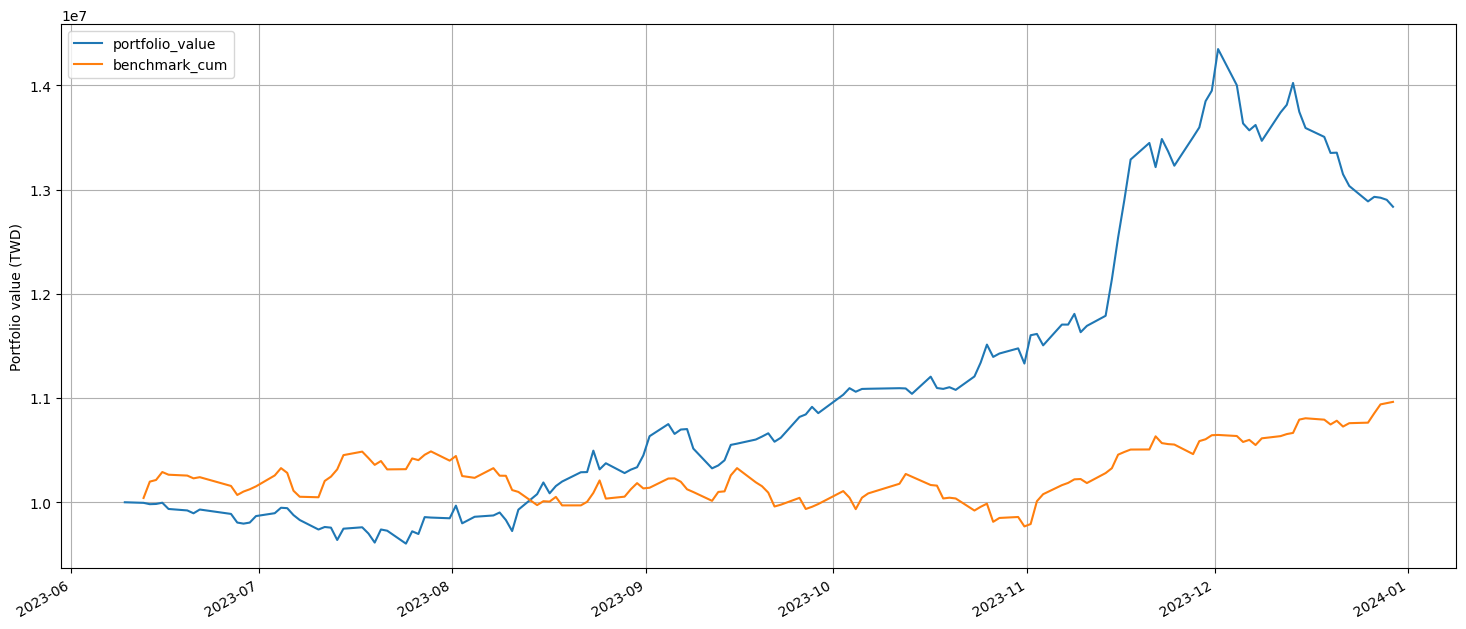

,period_open,period_close,starting_exposure,longs_count,shorts_count,short_exposure,long_exposure,returns,ending_cash,orders,...,sharpe,sortino,algorithm_period_return,algo_volatility,benchmark_period_return,excess_return,benchmark_volatility,trading_days,treasury_period_return,benchmark_cum
2023-06-09 13:30:00+08:00,2023-06-09 09:01:00+08:00,2023-06-09 13:30:00+08:00,0.00,0,0,0.0,0.00,0.000000,1.000000e+07,"[{'id': 'c014d5921e2643e999e31ba7391781e0', 'd...",...,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,1,0.0,NaN
2023-06-12 13:30:00+08:00,2023-06-12 09:01:00+08:00,2023-06-12 13:30:00+08:00,0.00,8,0,0.0,3766778.75,-0.000561,6.227614e+06,"[{'id': 'c014d5921e2643e999e31ba7391781e0', 'd...",...,-11.224972,-11.224972,-0.000561,0.006294,0.004111,-0.004671,NaN,2,0.0,1.004111e+07
2023-06-13 13:30:00+08:00,2023-06-13 09:01:00+08:00,2023-06-13 13:30:00+08:00,3766778.75,8,0,0.0,5307637.80,-0.001282,4.673940e+06,"[{'id': 'c014d5921e2643e999e31ba7391781e0', 'd...",...,-15.171553,-12.069597,-0.001842,0.010204,0.019798,-0.021640,0.129223,3,0.0,1.019798e+07
2023-06-14 13:30:00+08:00,2023-06-14 09:01:00+08:00,2023-06-14 13:30:00+08:00,5307637.80,8,0,0.0,6558762.95,0.000215,3.424964e+06,"[{'id': 'c014d5921e2643e999e31ba7391781e0', 'd...",...,-9.655384,-9.231103,-0.001627,0.010620,0.021377,-0.023004,0.119002,4,0.0,1.021377e+07
2023-06-15 13:30:00+08:00,2023-06-15 09:01:00+08:00,2023-06-15 13:30:00+08:00,6558762.95,8,0,0.0,7035773.50,0.001173,2.959661e+06,"[{'id': 'c014d5921e2643e999e31ba7391781e0', 'd...",...,-1.581024,-2.307878,-0.000457,0.014503,0.029004,-0.029460,0.097210,5,0.0,1.029004e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25 13:30:00+08:00,2023-12-25 09:01:00+08:00,2023-12-25 13:30:00+08:00,12784158.75,8,0,0.0,12636402.50,-0.011336,2.499111e+05,[],...,2.650305,4.545043,0.288631,0.183753,0.076366,0.212266,0.118954,136,0.0,1.076366e+07
2023-12-26 13:30:00+08:00,2023-12-26 09:01:00+08:00,2023-12-26 13:30:00+08:00,12636402.50,8,0,0.0,12679981.45,0.003382,2.499111e+05,[],...,2.674510,4.586692,0.292989,0.183086,0.085351,0.207638,0.118984,137,0.0,1.085351e+07
2023-12-27 13:30:00+08:00,2023-12-27 09:01:00+08:00,2023-12-27 13:30:00+08:00,12679981.45,8,0,0.0,12671728.05,-0.000638,2.499111e+05,[],...,2.657997,4.558936,0.292164,0.182450,0.093897,0.198267,0.118952,138,0.0,1.093897e+07
2023-12-28 13:30:00+08:00,2023-12-28 09:01:00+08:00,2023-12-28 13:30:00+08:00,12671728.05,8,0,0.0,12651498.00,-0.001566,2.499111e+05,[],...,2.631996,4.514835,0.290141,0.181849,0.095051,0.195090,0.118518,139,0.0,1.095051e+07


In [32]:
from zipline import run_algorithm
from zipline.utils.run_algo import get_transaction_detail

start_date = pd.Timestamp(start, tz = 'utc')
end_date = pd.Timestamp(end, tz = 'utc')  # 轉換成時間序列格式

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

# 取出 results 中的 positions, transactions & orders 資料表
positions, transactions, orders = get_transaction_detail(results)   
results

<Axes: >

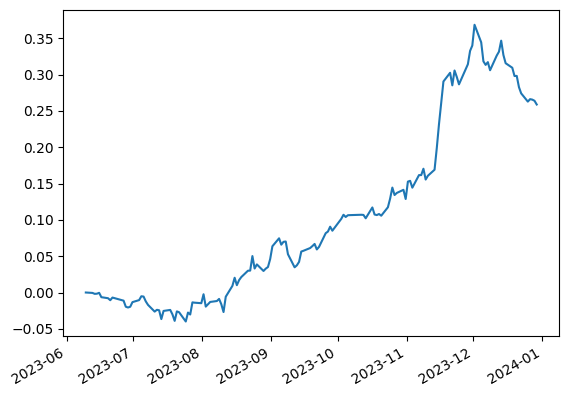

In [33]:
results.returns.cumsum().plot()  # 繪製累積回報圖

## Pyfolio

Pyfolio 與 zipline 的回測結果兼容，讓我們輕鬆用幾行程式碼，就能產出我們需要的投資風險及績效圖表。

p.s. 詳細 Pyfolio 使用方法可參考： TQuant Lab github：[Pyfolio](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Pyfolio.ipynb)

In [34]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)  # 從 results 資料表中取出 returns, positions & transactions
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

<Axes: title={'center': 'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

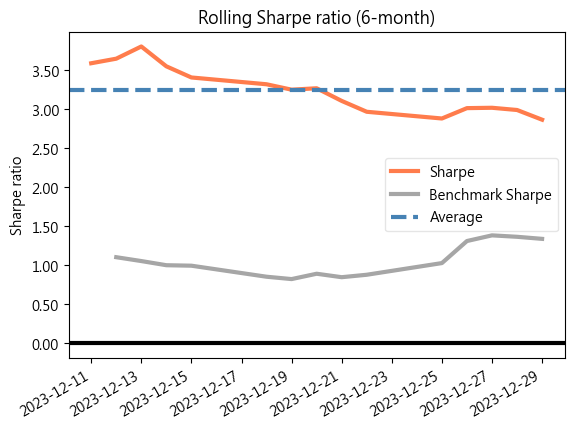

In [35]:
# 繪製夏普比率圖

from pyfolio.plotting import plot_rolling_sharpe

plot_rolling_sharpe(returns,
                    factor_returns=benchmark_rets)

Start date,2023-06-09
End date,2023-12-29
Total months,6
,Backtest
Annual return,56.71%
Cumulative returns,28.348%
Annual volatility,18.144%
Sharpe ratio,2.57
Calmar ratio,5.38
Stability,0.86
Max drawdown,-10.544%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,10.54,2023-12-01,2023-12-29,NaT,NaN
1,3.97,2023-06-09,2023-07-24,2023-08-14,44
2,3.95,2023-09-04,2023-09-11,2023-09-25,16
3,2.05,2023-08-23,2023-08-28,2023-09-01,8
4,1.90,2023-11-22,2023-11-24,2023-11-27,4


Stress Events,mean,min,max
New Normal,0.18%,-2.62%,3.31%


Top 10 long positions of all time,max
sid,
2543,32.31%
3622,15.51%
8249,14.96%
2538,14.17%
2612,13.42%
2809,13.30%
1109,12.39%
9944,12.36%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
2543,32.31%
3622,15.51%
8249,14.96%
2538,14.17%
2612,13.42%
2809,13.30%
1109,12.39%
9944,12.36%


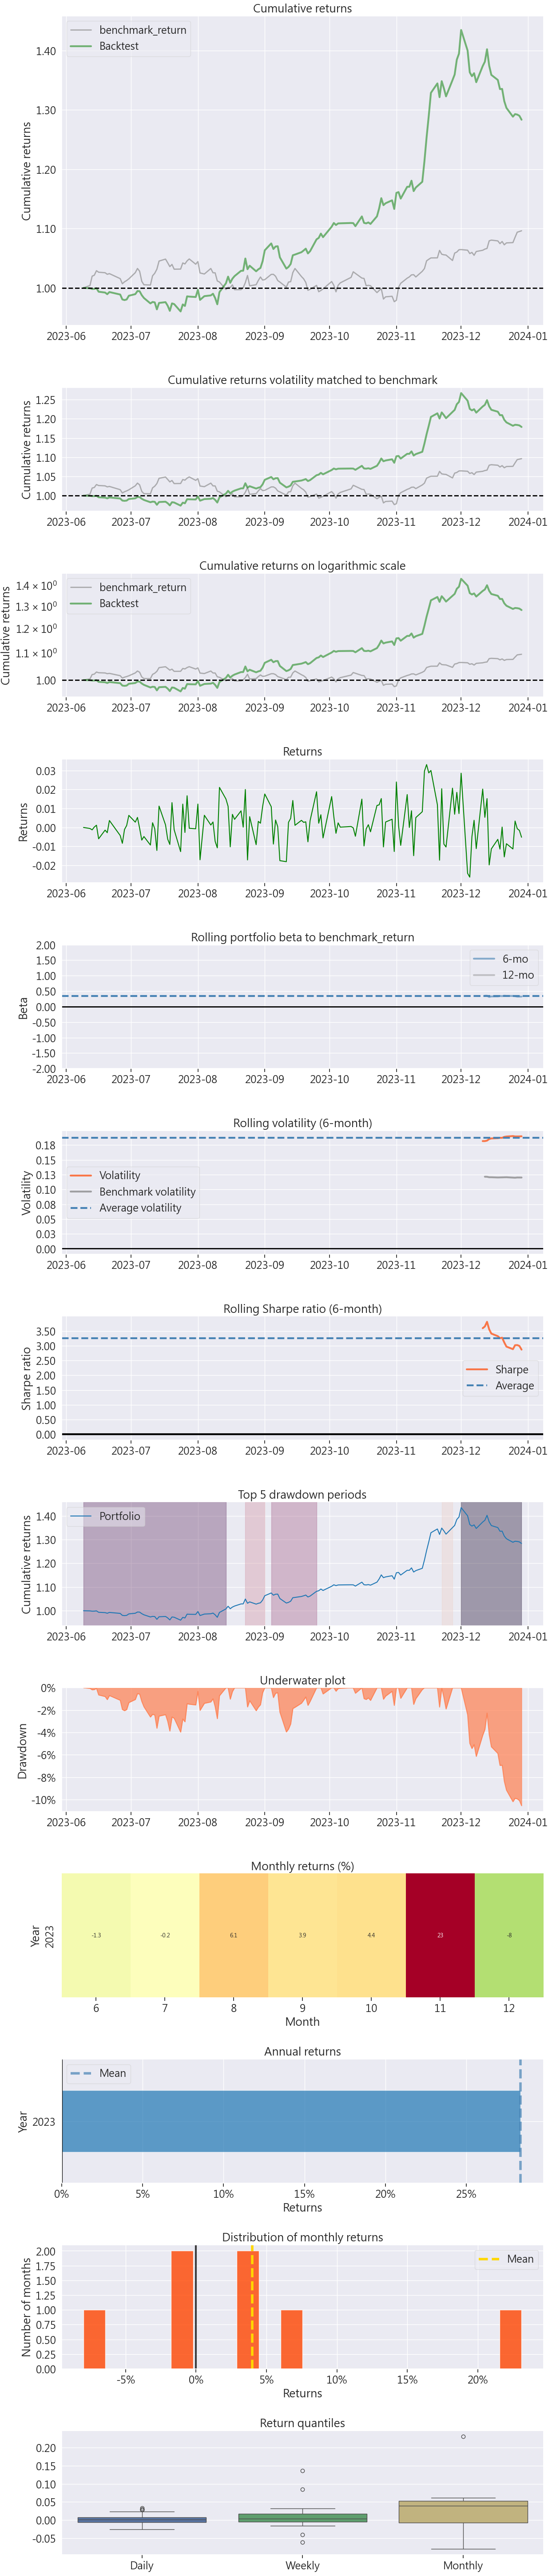

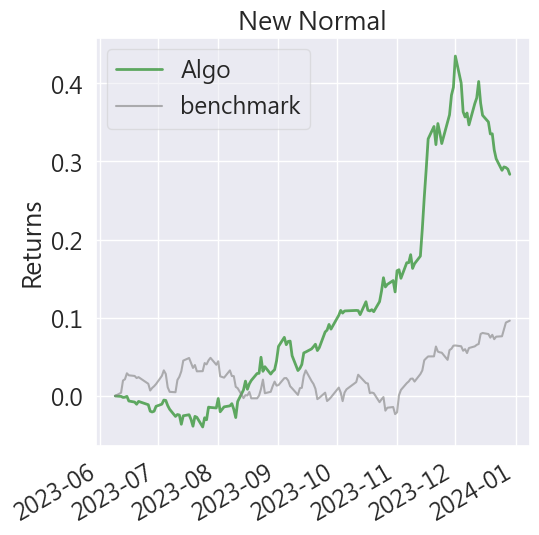

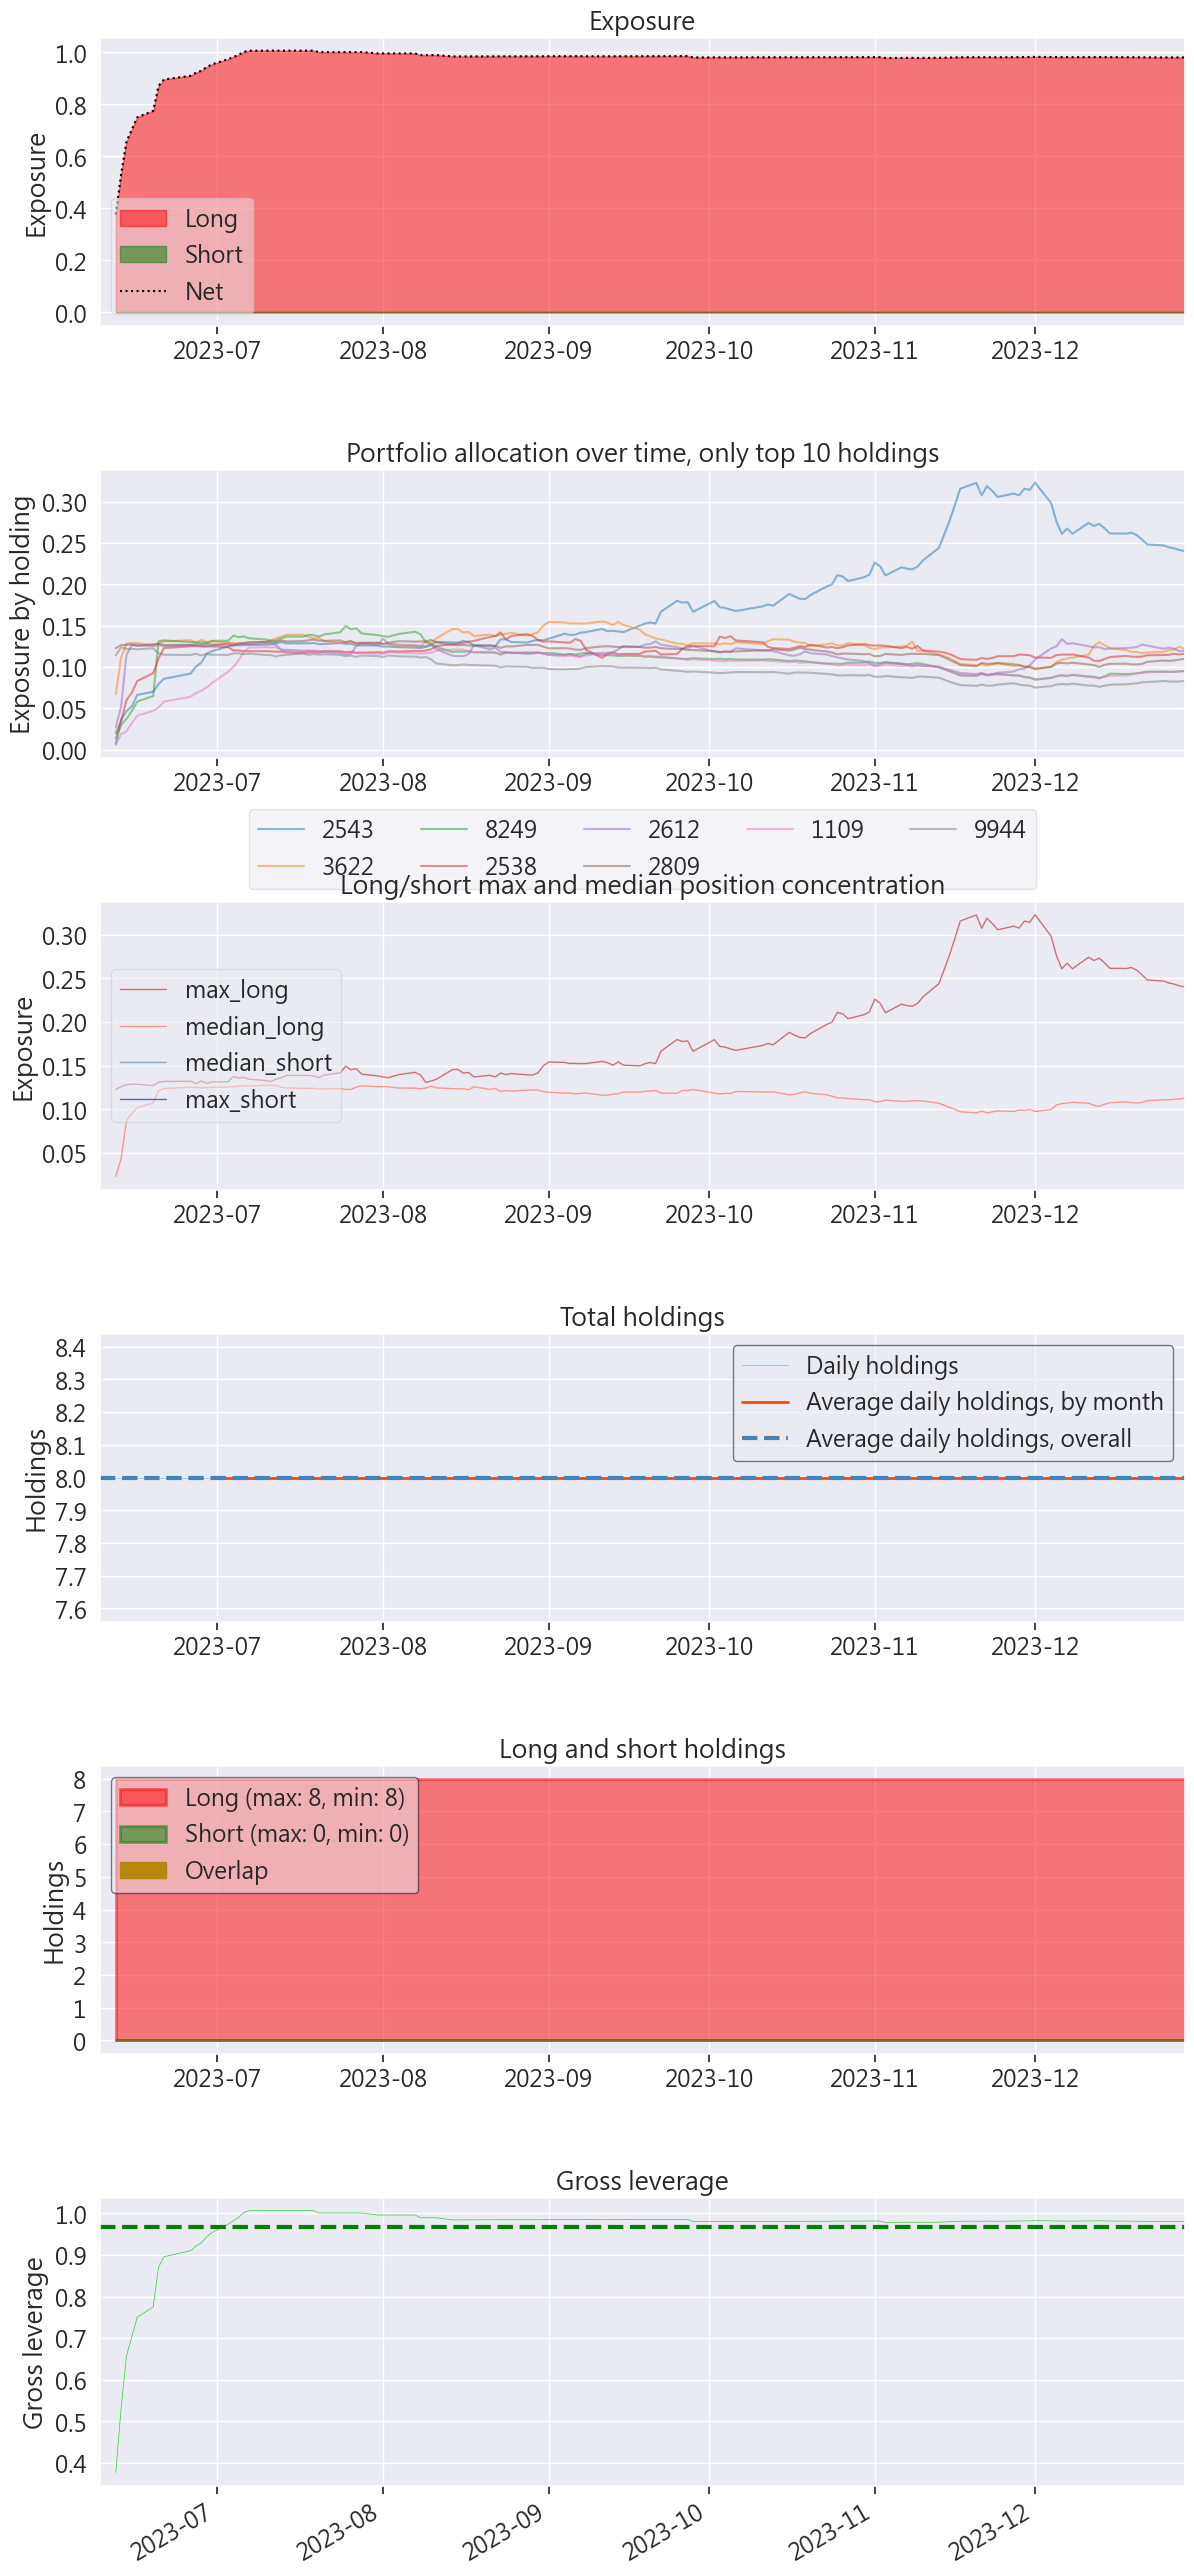

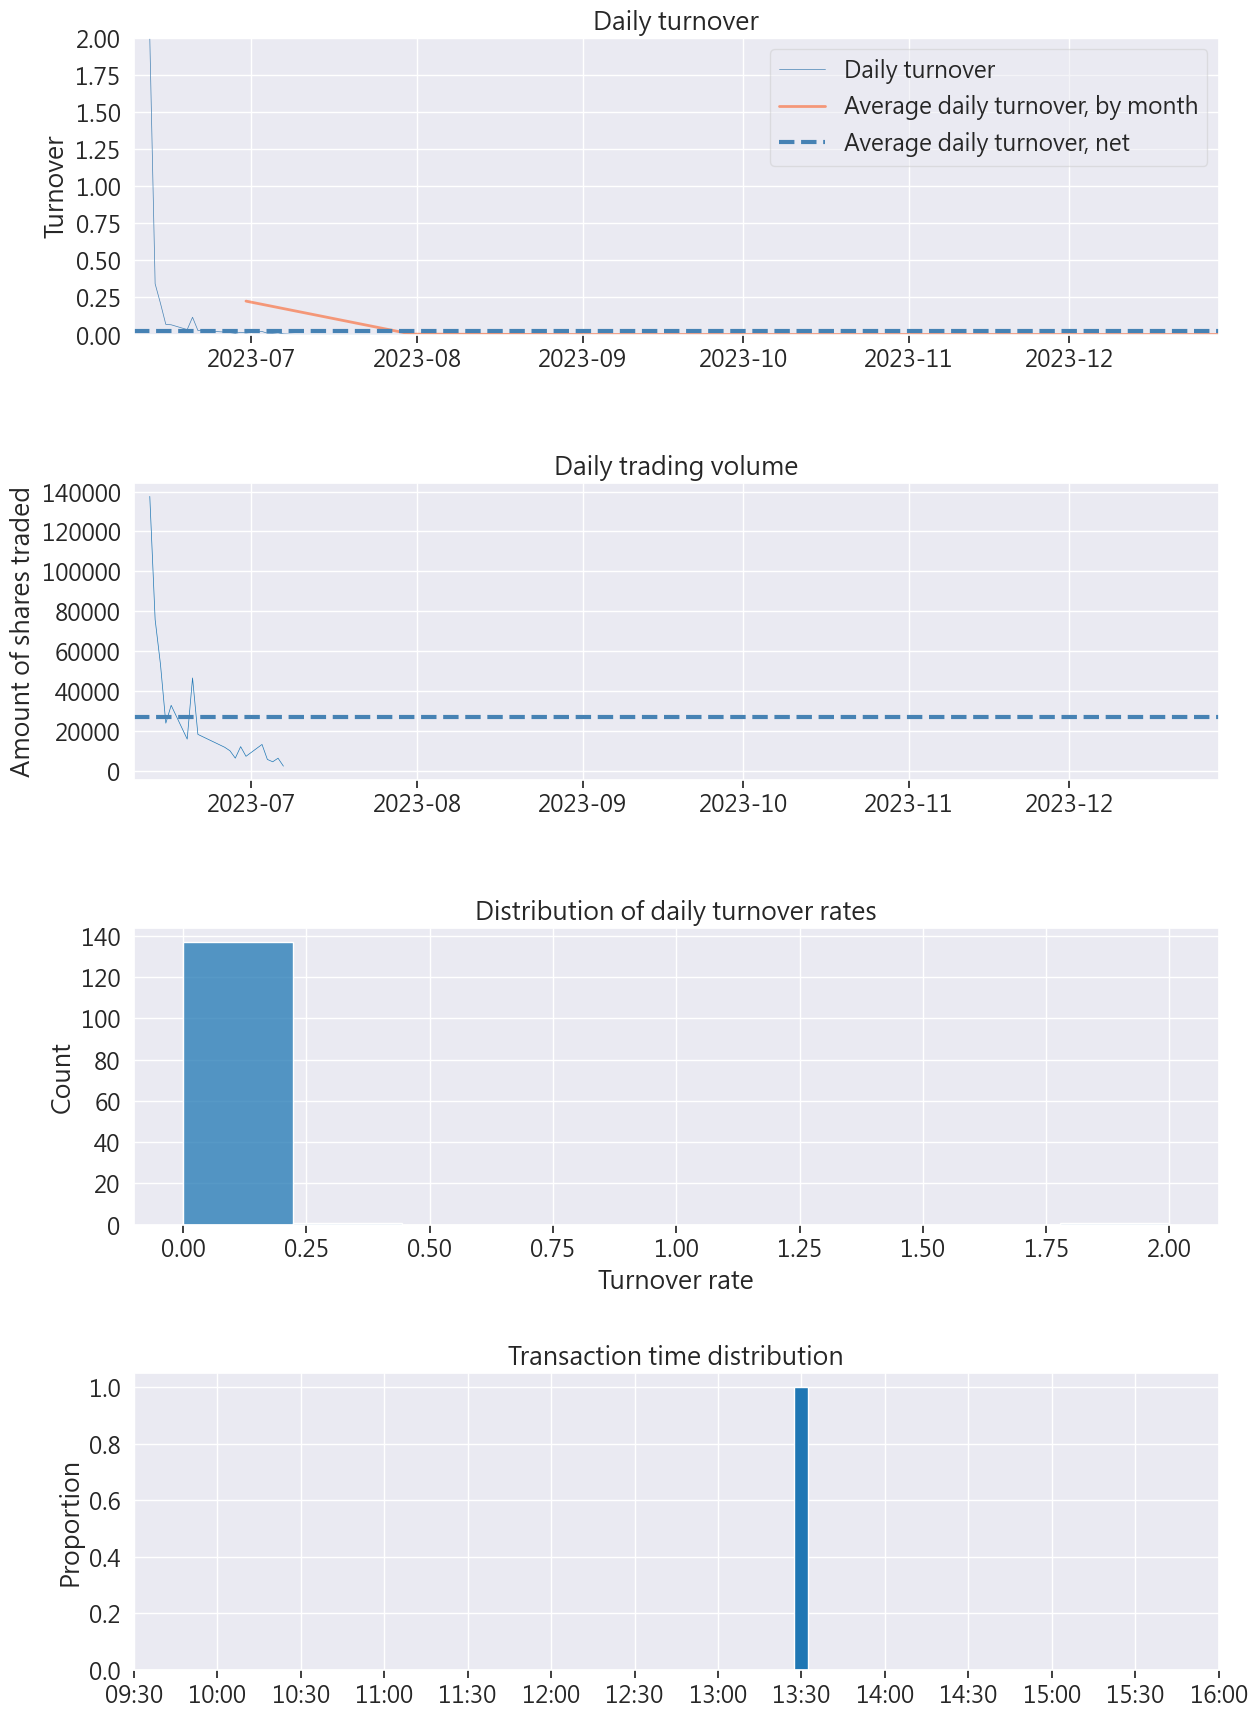

In [36]:
# 繪製 Pyfolio 中提供的所有圖表

pyfolio.tears.create_full_tear_sheet(returns=returns,
                                     positions=positions,
                                     transactions=transactions,
                                     benchmark_rets=benchmark_rets
                                    )